# Load & Info

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sessions dataset
train_merge = pd.read_csv('../data/train_merge.csv')

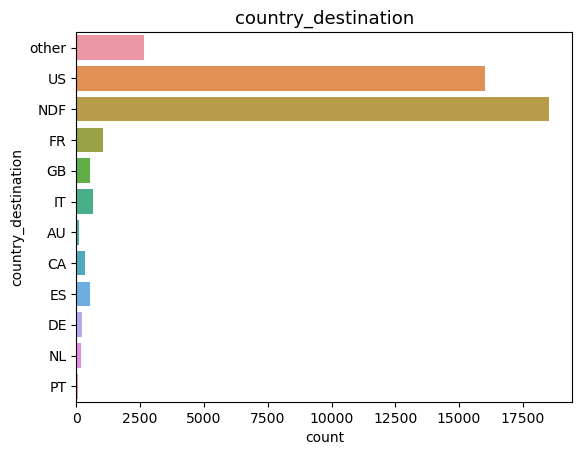

In [29]:
train_user = pd.read_csv('../data/train_merge.csv')

sns.countplot(y='country_destination', data=train_merge)
plt.title("country_destination", size=13);

In [30]:
train_merge.columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'most_frequent_action',
       'most_frequent_action_type', 'most_frequent_action_detail',
       'most_frequent_device_type', 'most_frequent_secs_elapsed'],
      dtype='object')

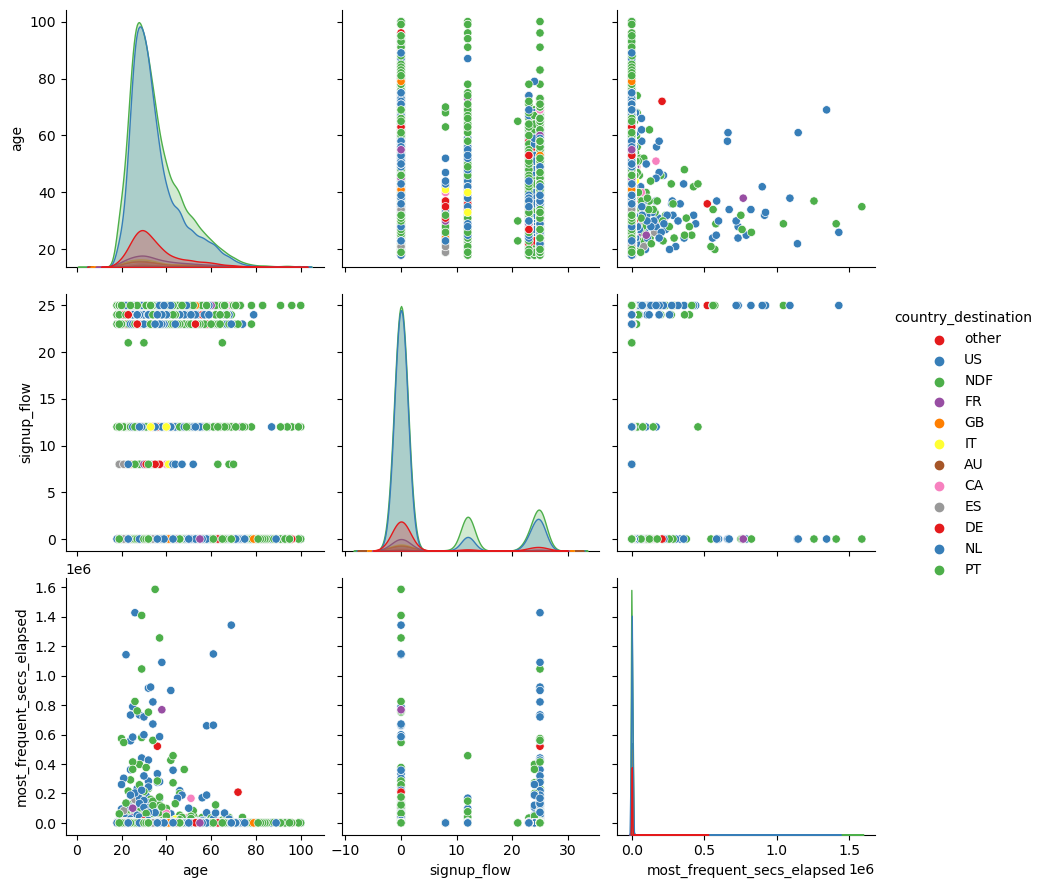

In [31]:
sns.pairplot(
    train_merge[['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'most_frequent_action','most_frequent_action_type','most_frequent_action_detail','most_frequent_device_type','most_frequent_secs_elapsed']],
    hue = "country_destination",
    height = 3,
    palette = "Set1")

C:\Users\ayoub\AppData\Local\Temp\ipykernel_4576\46955923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_merge.corr(), annot= True)


<Axes: >

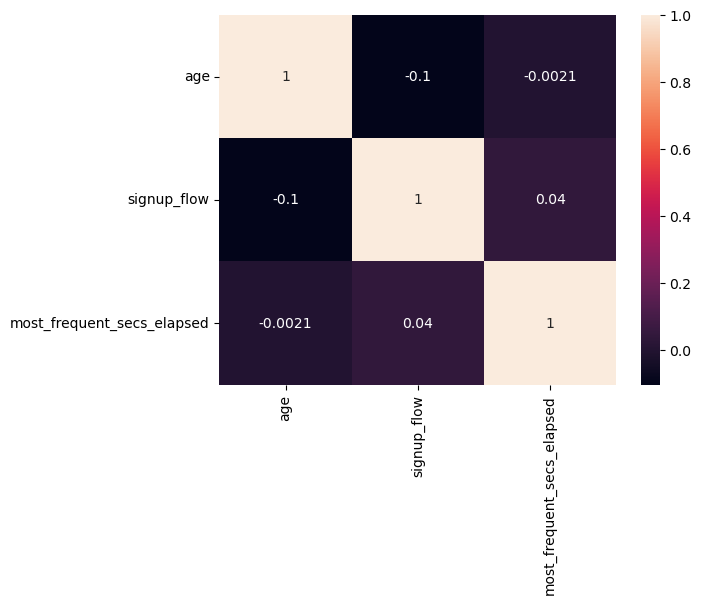

In [32]:
sns.heatmap(train_merge.corr(), annot= True)

# Type

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

label_encoder = LabelEncoder()

# Encode each column of strings separately
train_merge['gender'] = label_encoder.fit_transform(train_merge['gender'])
train_merge['signup_method'] = label_encoder.fit_transform(train_merge['signup_method'])
train_merge['language'] = label_encoder.fit_transform(train_merge['language'])
train_merge['affiliate_channel'] = label_encoder.fit_transform(train_merge['affiliate_channel'])
train_merge['affiliate_provider'] = label_encoder.fit_transform(train_merge['affiliate_provider'])
train_merge['first_affiliate_tracked'] = label_encoder.fit_transform(train_merge['first_affiliate_tracked'])
train_merge['signup_app'] = label_encoder.fit_transform(train_merge['signup_app'])
train_merge['first_device_type'] = label_encoder.fit_transform(train_merge['first_device_type'])
train_merge['first_browser'] = label_encoder.fit_transform(train_merge['first_browser'])

train_merge['most_frequent_action'] = label_encoder.fit_transform(train_merge['most_frequent_action'])
train_merge['most_frequent_action_type'] = label_encoder.fit_transform(train_merge['most_frequent_action_type'])
train_merge['most_frequent_action_detail'] = label_encoder.fit_transform(train_merge['most_frequent_action_detail'])
train_merge['most_frequent_device_type'] = label_encoder.fit_transform(train_merge['most_frequent_device_type'])

train_merge['affiliate_provider'] = label_encoder.fit_transform(train_merge['affiliate_provider'])
train_merge['first_affiliate_tracked'] = label_encoder.fit_transform(train_merge['first_affiliate_tracked'])

# train_merge['country_destination'] = label_encoder.fit_transform(train_merge['country_destination'])

In [34]:
train_merge['date_account_created'] = pd.to_datetime(train_merge['date_account_created'])
train_merge['timestamp_first_active'] = pd.to_datetime(train_merge['timestamp_first_active'])
train_merge['date_first_booking'] = pd.to_datetime(train_merge['date_first_booking'])

In [35]:
train_merge.dtypes

date_account_created           datetime64[ns]
timestamp_first_active         datetime64[ns]
date_first_booking             datetime64[ns]
gender                                  int32
age                                     int64
signup_method                           int32
signup_flow                             int64
language                                int32
affiliate_channel                       int32
affiliate_provider                      int64
first_affiliate_tracked                 int64
signup_app                              int32
first_device_type                       int32
first_browser                           int32
country_destination                    object
most_frequent_action                    int32
most_frequent_action_type               int32
most_frequent_action_detail             int32
most_frequent_device_type               int32
most_frequent_secs_elapsed            float64
dtype: object

In [36]:
train_merge = train_merge.drop(['date_account_created','timestamp_first_active','date_first_booking'], axis=1)

In [37]:
train_merge.to_csv('../data/train_merge_Num.csv',index=False)

# Data Preprocessing

In [155]:
y = train_merge['country_destination']

X = train_merge.drop(columns=['country_destination'])

In [156]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(16318, 16)

In [157]:
print(X_train.dtypes)

gender                           int32
age                              int64
signup_method                    int32
signup_flow                      int64
language                         int32
affiliate_channel                int32
affiliate_provider               int64
first_affiliate_tracked          int64
signup_app                       int32
first_device_type                int32
first_browser                    int32
most_frequent_action             int32
most_frequent_action_type        int32
most_frequent_action_detail      int32
most_frequent_device_type        int32
most_frequent_secs_elapsed     float64
dtype: object


In [158]:
print(y_train.dtypes)

category


# selector1

In [159]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k='all')
selector.fit(X_train, y_train)

selected_feature_indices = selector.get_support(indices=True)

selected_feature_names = X_train.columns[selected_feature_indices]
print(selected_feature_names)

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'most_frequent_action', 'most_frequent_action_type',
       'most_frequent_action_detail', 'most_frequent_device_type',
       'most_frequent_secs_elapsed'],
      dtype='object')


In [160]:
# Mutual Information : utilisée pour évaluer la relation entre chaque caractéristique et la variable cible.
# Elle mesure la quantité d'information que chaque caractéristique fournit sur la variable cible.

from sklearn.feature_selection import mutual_info_classif

mutual_info= mutual_info_classif(X_train, y_train)
mutual_info = pd.Series (mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

signup_method                  0.046535
most_frequent_action           0.038152
most_frequent_action_detail    0.026637
most_frequent_device_type      0.017659
signup_app                     0.015029
first_device_type              0.012375
first_browser                  0.011579
gender                         0.009476
affiliate_provider             0.008947
most_frequent_secs_elapsed     0.008893
most_frequent_action_type      0.008248
language                       0.008233
signup_flow                    0.006200
age                            0.005275
affiliate_channel              0.004995
first_affiliate_tracked        0.003466
dtype: float64

## selector2

We need to convert "country_destination" to int

In [174]:
# # SelectPercentile : est une approche de sélection de caractéristiques permet de sélectionner un pourcentage spécifique
# # des caractéristiques les plus importantes en fonction d'un test statistique.
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_regression

# selector2 = SelectPercentile(f_regression, percentile=60)

# selector2.fit(X, y)

# selected_feature_indices2 = selector2.get_support(indices=True)

# selected_feature_names2 = X.columns[selected_feature_indices2]

# print(selected_feature_names2)

## selector3

In [193]:
from sklearn.feature_selection import f_classif

# SelectKBest: est une methode de sélection de caractéristiques qui permet de sélectionner les K meilleures caractéristiques
# en fonction d'un test statistique 
selector3 = SelectKBest(f_classif, k=4
selector3.fit(X, y)

selected_feature_indices = selector3.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

Index(['gender', 'signup_method', 'signup_flow', 'affiliate_provider',
       'first_device_type'],
      dtype='object')


# Selected

In [194]:
selected_feature_names

Index(['gender', 'signup_method', 'signup_flow', 'affiliate_provider',
       'first_device_type'],
      dtype='object')

In [195]:
X = X[selected_feature_names]

In [196]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(16318, 5)

# Fiting

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create a pipeline with preprocessing and the logistic regression model
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression model
])

# Fit the pipeline on your training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

# Accuracy

In [198]:
from sklearn.metrics import accuracy_score

# Assuming you have trained your model and obtained predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy) 
# 0.4678882215957838 : all
# 0.5371369040323569 : 10
# 0.5383625444294644 : 8
# 0.5386076725088859 : 6
#  : 5
# 0.5392204927074397 : 4 
# 0.5392204927074397 : 3
# 0.539281774727295 : 2
# 0.539281774727295 : 1

Accuracy: 0.5387302365485966


# Predict

In [154]:
X.head()

,signup_method
0,0
1,1
2,0
3,0
4,1


In [ ]:
y

In [ ]:
# # Assuming new_user_features is your new user's features
# new_user_features = [[1,41,1,5,8,5,55,5,5,5,4,4,9,7,3,9]]  

# # Predict the country destination for the new user
# predicted_destination = pipeline.predict(new_user_features)[0]

# print('Predicted Country Destination:', predicted_destination)

# Visualize

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

In [ ]:
import seaborn as sns

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Submission

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the test data
test_data = pd.read_csv("../data/test_user.csv")
most_frequent_actions = pd.read_csv("../data/most_frequent_actions.csv")

# Merging
test_data = test_data.merge(most_frequent_actions, left_on='id', right_on='user_id', how='inner')

# Cleaning
test_data = test_data[selected_feature_names]

## Type

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

label_encoder = LabelEncoder()

# Encode each column of strings separately
test_data['gender'] = label_encoder.fit_transform(test_data['gender'])
test_data['signup_method'] = label_encoder.fit_transform(test_data['signup_method'])
test_data['language'] = label_encoder.fit_transform(test_data['language'])
test_data['affiliate_channel'] = label_encoder.fit_transform(test_data['affiliate_channel'])
test_data['signup_app'] = label_encoder.fit_transform(test_data['signup_app'])
test_data['first_device_type'] = label_encoder.fit_transform(test_data['first_device_type'])
test_data['first_browser'] = label_encoder.fit_transform(test_data['first_browser'])

test_data['most_frequent_action'] = label_encoder.fit_transform(test_data['most_frequent_action'])
test_data['most_frequent_action_type'] = label_encoder.fit_transform(test_data['most_frequent_action_type'])
test_data['most_frequent_action_detail'] = label_encoder.fit_transform(test_data['most_frequent_action_detail'])
test_data['most_frequent_device_type'] = label_encoder.fit_transform(test_data['most_frequent_device_type'])

test_data['affiliate_provider'] = label_encoder.fit_transform(test_data['affiliate_provider'])
test_data['first_affiliate_tracked'] = label_encoder.fit_transform(test_data['first_affiliate_tracked'])
# train_merge['country_destination'] = label_encoder.fit_transform(train_merge['country_destination'])

In [ ]:
# Calculate the mode of the column
mode_value = test_data['age'].value_counts().idxmax()

# Impute missing values with the mode
test_data['age'] = test_data['age'].fillna(mode_value)

In [ ]:
test_data[selected_feature_names]

In [ ]:
# Predict using the trained model
test_predictions = pipeline.predict(test_data[selected_feature_names])

In [ ]:
train_merge['country_destination'] = train_merge['country_destination'].astype('category')

# # Map predicted class labels to category codes
test_data['predicted_country'] = pd.Categorical(test_predictions, categories=train_merge['country_destination'].cat.categories)

In [ ]:
test_data

In [ ]:
test_data['predicted_country'].unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='predicted_country', data=test_data)
plt.title("predicted_country", size=13);

In [ ]:
# Predict using the trained model
# test_predictions = pipeline.predict(test_data)

submission = pd.read_csv("../data/sample_submission_NDF.csv")

# Prepare submission file
submission['country'] = test_data[['predicted_country']]

submission.to_csv('../data/submission.csv', index=False)